In [97]:
from platform import python_revision

import torch
import numpy as np
import matplotlib.pyplot as plt

In [98]:
import torch.nn as nn

In [99]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [100]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [101]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1), dtype=torch.float)

In [102]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [103]:
y = 2 * X + 1 + e

In [104]:
y.shape

torch.Size([50, 1])

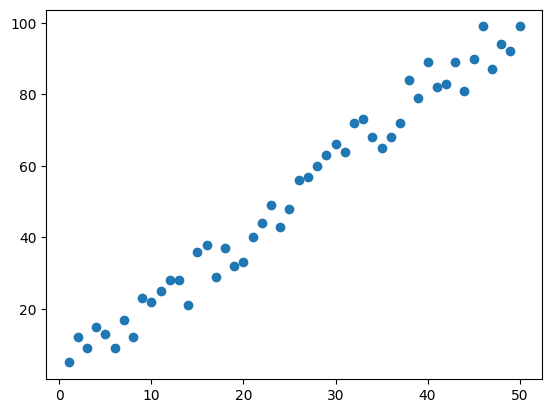

In [105]:
plt.scatter(X.numpy(), y.numpy())

In [106]:
torch.manual_seed(59)
model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [107]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred


In [108]:
torch.manual_seed(59)
model = Model(1,1)
for name,param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [109]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<ViewBackward0>)


In [110]:
x1 = np.linspace(0.0, 50.0, 50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [111]:
w1 = 0.1059
b1 = 0.9637

y1 = w1 * x1 + b1
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

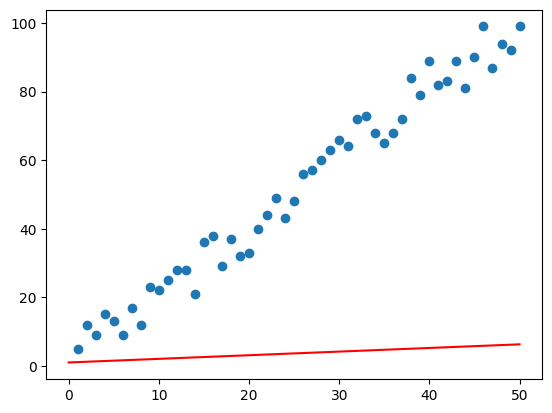

In [112]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1, 'r')

In [113]:
model.linear.weight

Parameter containing:
tensor([[0.1060]], requires_grad=True)

In [114]:
# loss function
criterion = nn.MSELoss()

In [115]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [116]:
epochs = 50
losses = []

for i in range(epochs):
    i = i +1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f"epoch: {i}, loss: {loss.item()}, weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1, loss: 3057.216796875, weight: 0.10597813129425049 bias: 0.9637961387634277
epoch: 2, loss: 795363.8125, weight: 32.395198822021484 bias: 1.930471420288086
epoch: 3, loss: 208347296.0, weight: -490.21441650390625 bias: -13.58968734741211
epoch: 4, loss: 54578487296.0, weight: 7968.29833984375 bias: 237.73146057128906
epoch: 5, loss: 14297331662848.0, weight: -128934.015625 bias: -3829.81494140625
epoch: 6, loss: 3745317245681664.0, weight: 2086850.75 bias: 62004.16796875
epoch: 7, loss: 9.81119926548824e+17, weight: -33775960.0 bias: -1003528.6875
epoch: 8, loss: 2.5701335867524435e+20, weight: 546669120.0 bias: 16242283.0
epoch: 9, loss: 6.732699497493946e+22, weight: -8847922176.0 bias: -262883792.0
epoch: 10, loss: 1.7636918173815647e+25, weight: 143204958208.0 bias: 4254813696.0
epoch: 11, loss: 4.620152631235363e+27, weight: -2317794148352.0 bias: -68864802816.0
epoch: 12, loss: 1.2102915280014751e+30, weight: 37513854976000.0 bias: 1114587398144.0
epoch: 13, loss: 3.1704

Text(0.5, 0, 'epoch')

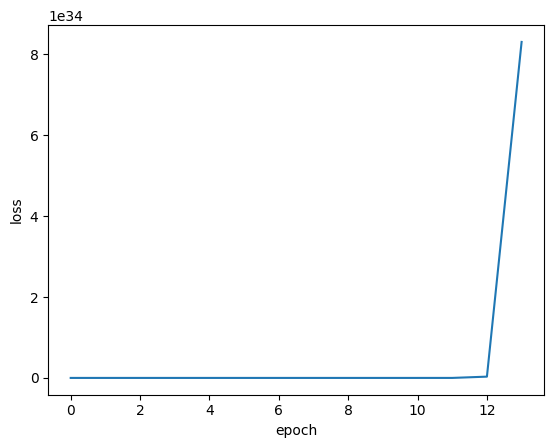

In [119]:
losses_numpy = [loss.detach().numpy() for loss in losses]
plt.plot(range(epochs), losses_numpy)
plt.ylabel('loss')
plt.xlabel('epoch')